In [3]:
#importing libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve,roc_auc_score

In [4]:
#loading the data
data_path="../data/processed/processed_loan_data.csv"
df=pd.read_csv(data_path)

print(df.shape)

(45000, 16)


In [5]:
#splitting the data
x=df.drop(columns=['loan_status'])
y=df["loan_status"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)


In [6]:
#loading the saved models
model_files=[
    "../models/base_logistic_regression_model.pkl",
    "../models/base_random_forest_model.pkl",
    "../models/base_gradient_boosting_model.pkl",
    "../models/base_xgboost_model.pkl",
    "../models/optimized_logistic_regression_model.pkl",
    "../models/optimized_random_forest_model.pkl",
    "../models/optimized_gradient_boosting_model.pkl",
    "../models/optimized_xgboost_model.pkl"
]
models={}
for file in model_files:
    model_name=file.split("/")[-1].replace(".pkl","")
    models[model_name]=joblib.load(file)
print(models.keys())

dict_keys(['base_logistic_regression_model', 'base_random_forest_model', 'base_gradient_boosting_model', 'base_xgboost_model', 'optimized_logistic_regression_model', 'optimized_random_forest_model', 'optimized_gradient_boosting_model', 'optimized_xgboost_model'])


In [7]:
#evaluating the models
results={}
for name,model in models.items():
    y_pred=model.predict(x_test)
    results[name]={
        "accuracy":accuracy_score(y_test,y_pred),
        "precision":precision_score(y_test,y_pred),
        "recall":recall_score(y_test,y_pred),
        "f1_score":f1_score(y_test,y_pred),
        "roc_auc":roc_auc_score(y_test,y_pred)
    }

In [8]:
#results
results_df=pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
                                     accuracy  precision  recall  f1_score  \
base_logistic_regression_model       0.897222   0.778642  0.7510  0.764571   
base_random_forest_model             0.928444   0.896956  0.7660  0.826321   
base_gradient_boosting_model         0.923556   0.881395  0.7580  0.815054   
base_xgboost_model                   0.937667   0.891671  0.8190  0.853792   
optimized_logistic_regression_model  0.896556   0.776800  0.7500  0.763165   
optimized_random_forest_model        0.929556   0.899415  0.7690  0.829111   
optimized_gradient_boosting_model    0.939333   0.904338  0.8130  0.856240   
optimized_xgboost_model              0.936778   0.892485  0.8135  0.851164   

                                      roc_auc  
base_logistic_regression_model       0.845000  
base_random_forest_model             0.870429  
base_gradient_boosting_model         0.864429  
base_xgboost_model                   0.895286  
optimized_logistic_regression_m

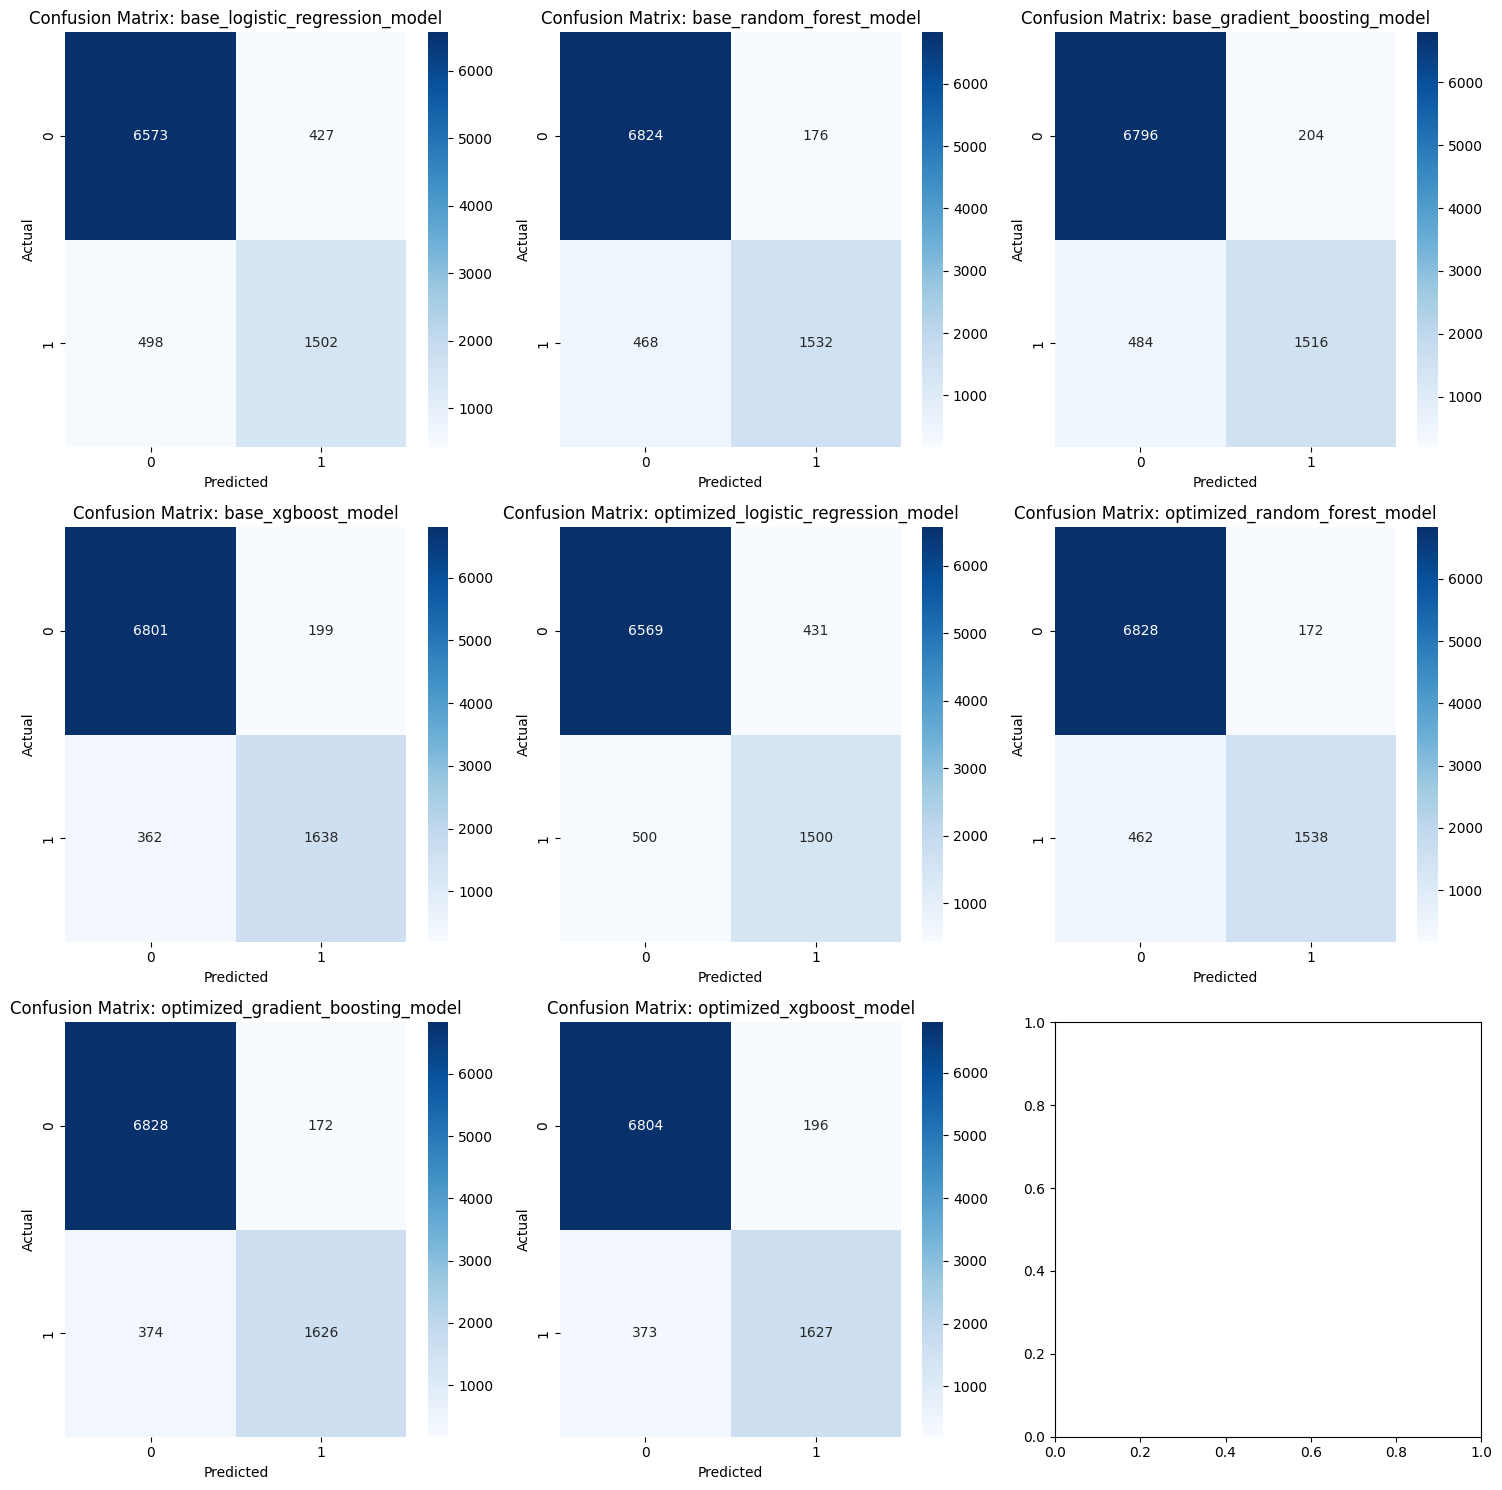

In [9]:
#writing confusion matrix
fig,axes=plt.subplots(3,3,figsize=(15,15))
axes=axes.flatten()
for i,(name,model) in enumerate(models.items()):
    y_pred=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

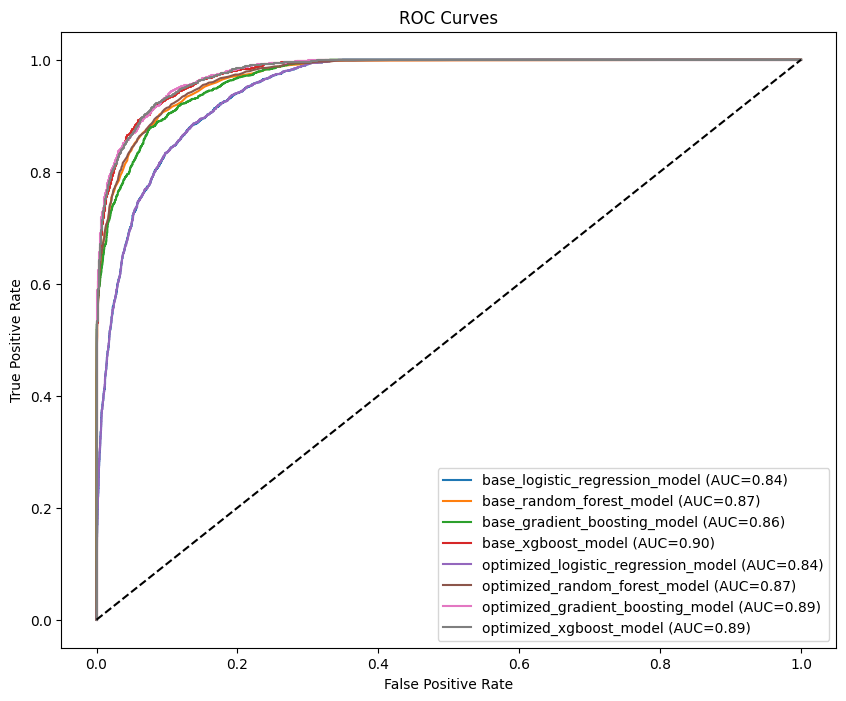

In [10]:
#roc curves
plt.figure(figsize=(10,8))
for name,model in models.items():
    y_pred_proba=model.predict_proba(x_test)[:,1]
    fpr,tpr,_=roc_curve(y_test,y_pred_proba)
    plt.plot(fpr,tpr,label=f"{name} (AUC={roc_auc_score(y_test,model.predict(x_test)):.2f})")   
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()